In [1]:
import numpy as np
import pandas as pd
import importlib
import WI_Fun
importlib.reload(WI_Fun)
from WI_Fun import ta_plot, winkler_index

In [ ]:
# Adjust inforamtion below:
# where is the one-year hourly air temperature CSV file located?
input_csv = r'C:\GitHub\Winkler-Index-Air-Temperature\Demo_Data.csv'
# do you want to plot the data (maximum, mean, minimum air temperature)?
do_plot = True

The total number of recoreds is: 8760
The number of missing Ta values is: 503
The table head is as follows:
   Year  Month  Day  Hour  Minute  DOY  TOD      DEC    Ta
0  2019      1    1     0      30    1  0.5  1.02083  3.51
1  2019      1    1     1      30    1  1.5  1.06250  2.66
2  2019      1    1     2      30    1  2.5  1.10417  2.94
3  2019      1    1     3      30    1  3.5  1.14583  3.17
4  2019      1    1     4      30    1  4.5  1.18750  2.03


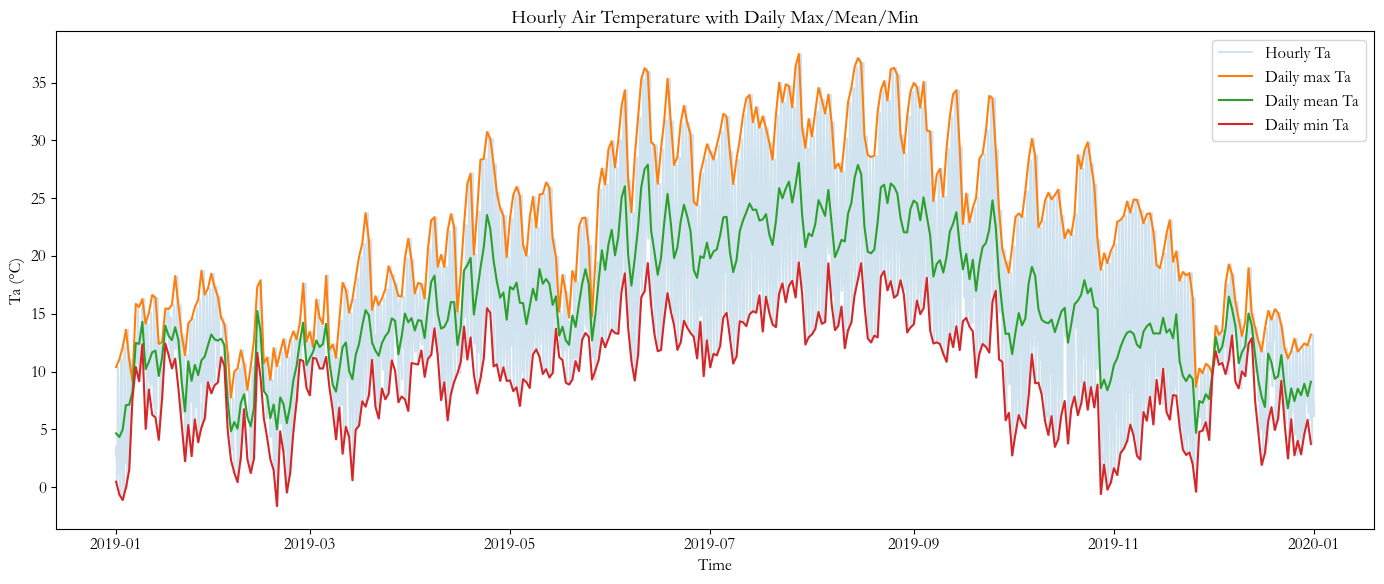


Winkler Index summary:
 year  winkler_index  season_days_total  season_days_used  season_days_dropped
 2019       2040.415                214               211                    3


In [ ]:
# Run below directly and find the results at the end
df = pd.read_csv(input_csv, sep="\t")
df["Ta"] = df["Ta"].replace(-9999.0, np.nan)
print("The total number of recoreds is:", len(df))
print("The number of missing Ta values is:", df["Ta"].isna().sum())
print("The table head is as follows:")
print(df.head())
# print(df.shape)
# print(df.dtypes)

if do_plot:
    ta_plot(df, ta_col="Ta")

summary, daily = winkler_index(
    df,
    ta_col="Ta",
    base_temp_c=10.0,
    season_start="04-01",
    season_end="10-31",
    min_samples_per_day=18,
)

print("\nWinkler Index summary:")
print(summary.to_string(index=False))